# Example 1: forward-difference approximation
In this example, we'll use Python to approximate the derivative $f^\prime(a)$ of a function $f(x)$ at a point $x=a$, using a method based on the definition of the derivative:
$$f^\prime(a) = \lim_{h\rightarrow0} \frac{f(a+h)-f(a)}{h}.$$
We'll use this example to explore some of the fundamental issues we have to deal with in computational modelling.


Specifically, we're going to calculate
$$\frac{f(a+h)-f(a)}{h}$$
for a range of different values of $h$, in the hope that we get a better approximation to the derivative as $h$ gets smaller. This is called the **forward difference** approximation of the derivative.  It's straightforward to calculate it in Python, once we've set up all the appropriate functions and variables; to find the forward difference approximation `approx` at a given value of `h` we just need:
```
approx = (f(a+h)-f(a))/h
```

To illustrate the forward difference approximation we'll use the function
$$f(x)=e^x$$
and try to compute the derivative at the point $x=1$.



Of course, in this case we know the *true* derivative
$$f^\prime(x)=e^x$$
and so we know that the value we're expecting to find is
$$f^\prime(1) = e^1 \approx 2.718281828459045.$$
Thus we can also calculate the (absolute value of the) difference between the forward difference approximation and the true value.  This value is called the **absolute error**. Again it's straightforward to compute in Python if we know the true value  `true = fdash(a)`:
```
abserr = abs(approx-true)
```

In [1]:
import numpy as np

# function to differentiate
def f(x):
    y = np.exp(x)
    return y

# the derivative of f
def fdash(x):
    y = np.exp(x)
    return y

# where to evaluate the derivative
a = 1;

# true answer
true = fdash(a)

# starting value of h
h = 1e0

# minimum value of h
hmin = 1e-16

# change in h per iteration
dh = 1e-2

# current approximation and absolute error
approx = (f(a+h)-f(a))/h
abserr = abs(approx-true)

# pretty print the output
print('        h               fd_h           |fd_h-e|');
print('{:9.2e} {:18.14f} {:18.14f}'.format(h,approx,abserr))

# generate approximations
while h>hmin:
    # current approximation and error
    h = h*dh
    approx = (f(a+h)-f(a))/h
    abserr = abs(approx-true)
    
    # pretty print the output
    print('{:9.2e} {:18.14f} {:18.14f}'.format(h,approx,abserr))

        h               fd_h           |fd_h-e|
 1.00e+00   4.67077427047161   1.95249244201256
 1.00e-02   2.73191865578712   0.01363682732808
 1.00e-04   2.71841774708292   0.00013591862388
 1.00e-06   2.71828318743061   0.00000135897157
 1.00e-08   2.71828182185629   0.00000000660275
 1.00e-10   2.71828337616853   0.00000154770948
 1.00e-12   2.71871414270208   0.00043231424304
 1.00e-14   2.70894418008538   0.00933764837366
 1.00e-16   0.00000000000000   2.71828182845905
 1.00e-18   0.00000000000000   2.71828182845905


However, what we see when we run the code is a bit disturbing. For a while &mdash; up to $h=10^{-8}$ &mdash; the absolute error does indeed decrease as $h$ decreases, as we would expect. That is, to begin with, the forward difference approximation improves as $h$ decreases. However, after that, for $h<10^{-8}$ the absolute error starts to increase again, meaning the approximation is getting worse. By the time we get to $h=10^{-16}$ the numerically calculated forward difference approximation is completely wrong, returning `0` as a result.

### Exercise
Try changing the function $f(x)$ in the code above. Does it make any difference? Don't forget to change $f^\prime(x)$ too!

## Example 1: plotting a graph of absolute error versus $h$

We can explore the behaviour of the algorithm in more detail by plotting a graph of the absolute error versus $h$.  For this, it's more efficient to use NumPy's vectorized operations.

Note that we've chosen to create an array of _logarithmically-spaced_ values of $h$, and a _log-log_ plot of error versus $h$, because both $h$ and the absolute error are varying over many orders of magnitude. We'll also be able to use the log-log plot to analyse the algorithm, as we'll see a bit later on.

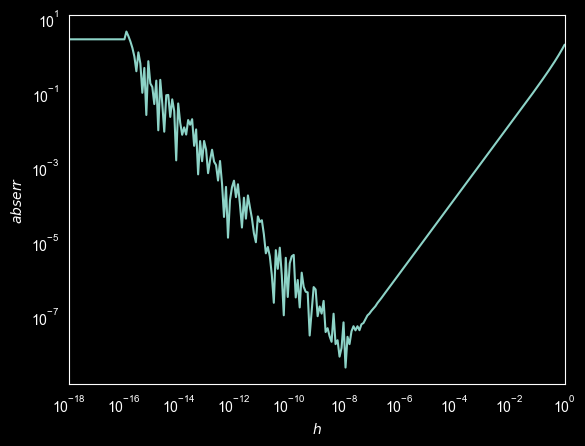

In [2]:
import matplotlib.pyplot as plt

# function to differentiate
def f(x):
    y = np.exp(x)
    return y

# the derivative of f
def fdash(x):
    y = np.exp(x)
    return y

# where to evaluate the derivative
a = 1;

# true answer
true = fdash(a)

# array of values of h, forward difference approximation, and absolute error
h = np.logspace(-18,0,250)
approx = (f(a+h)-f(a))/h
abserr = abs(approx-true)

# plot a graph of error versus h
fig1 = plt.figure()
plt.plot(h,abserr)
plt.grid()                            # add a grid, for ease of visualisation
plt.xlabel('$h$')                     # add x- and y-axis labels
plt.ylabel('$abserr$')
plt.xlim(1e-18,1e0)                   # change the x-axis limits
plt.xticks(np.logspace(-18,0,10));    # change the x-axis ticks
plt.xscale('log')                     # set both x- and y-axes to be log-scale
plt.yscale('log')

The resulting graph is typical of the behaviour of computational algorithms that attempt to compute an approximate solution of an infinite problem. As we'll see in more detail later on, it exhibits two of the sources of error we have to learn to deal with in computational modelling:
* **truncation error**: the smooth portion of the graph, for larger $h$, caused by the fact that the algorithm only calculates an approximate answer to an infinite problem
* **rounding error**: the noisy portion of the graph, for smaller $h$, caused by finite precision floating-point arithmetic

### Exercise
What happens if you change the axes in the plot above to linear, instead of logarithmic? E.g., by commenting out the last three lines of code in the snippet above. Can you still see the effects of truncation and rounding error? Why/why not? 

## Effects of rounding error
Rounding error is caused by the finite precision storage of floating point numbers in Python (and pretty much every other programming language).  As explained in the lecture notes, floats in Python are [double precision](https://en.wikipedia.org/wiki/Double-precision_floating-point_format) by default: 64 bits (in base-2), with 1 bit for the sign, 52 bits for the mantissa, and 11 bits for the mantissa).

One of the consequences of this is that there are largest, and smallest non-zero, positive real numbers that we can store as floats. We can see those by typing:

In [3]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

`max` and `min` are the largest and smallest non-zero positive floats; e.g., anything larger than `max` is infinity in Python:

In [4]:
x = 1.7976931348623157e+308
print(x+x)
print(10*x)

inf
inf


Python uses [subnormal numbers](https://en.wikipedia.org/wiki/Subnormal_number) to fill in the gap around zero between `+min` and `-min`, so that computations with very small numbers lose significance in a graceful manner, but even so there's still a smallest (in magnitude) real number that can be stored:

In [5]:
x = 2.2250738585072014e-308
print(x)
print(1e-15*x)
print(1e-16*x)

2.2250738585072014e-308
2.5e-323
0.0


More fundamentally, almost every real number is only stored approximately as a Python float. The effects of this can sometimes look quite surprising. For example,

In [6]:
x = 0.2
print(x)

0.2


In [7]:
x += 0.2
print(x)

0.4


In [8]:
x += 0.2
print(x)

0.6000000000000001


In [9]:
0.25 + 0.5 == 0.75

True

In [10]:
0.1 + 0.2 == 0.3

False

In [11]:
a = np.sqrt(2)
b = a*a
b == 2

np.False_

All of this is caused by the finite precision of floats in Python. We can force Python to show us more decimal places of the floating point representation of any given number via the `format()` method. Here `'{:.99g}'` specifies a 'general' formatted number with max. 99 digits after the decimal place (the `g` format removes trailing zeros; try changing the format specifier from `'{:.99g}'` to `'{:.99f}'`). This indeed suggests that there is a small error when we try to store the decimal 0.2 as a float.

In [12]:
print('{:.99g}'.format(0.2))

0.200000000000000011102230246251565404236316680908203125


## Measuring the rounding error
The accuracy with which Python stores floats is one of the other pieces of information we get from the output of `sys.float_info`; the value `epsilon=2.220446049250313e-16` is called the **floating point accuracy**. We can extract and define it by typing:

In [13]:
# define epsilon to be the floating point accuracy
flinfo = sys.float_info
epsilon = flinfo[8]
print('epsilon =',epsilon)

epsilon = 2.220446049250313e-16


A real number $x$ is stored by Python as a float with a rounding error of about
$$\epsilon|x|.$$
For example, we tried above to calculate $b=(\sqrt{2})\times(\sqrt{2})$, but found that Python gave us an answer `b` that was not equal to 2. Looking at the value of `b` we see that it's close to, but indeed not equal to 2. The absolute error in the value of `b` that Python has calculated `abs(b-2)` is about $4.44\times10^{-16}=\epsilon\times|2|$, in agreement with the $\epsilon|x|$ formula:

In [14]:
print('b =',b)
print('|b-2| =',abs(b-2))
print('epsilon*|b| =',epsilon*abs(b))

b = 2.0000000000000004
|b-2| = 4.440892098500626e-16
epsilon*|b| = 4.440892098500627e-16


In other words, the computation of $(\sqrt{2})\times(\sqrt{2})$  only gives us an answer to floating point accuracy. This is one of the effects of doing a computation that involves real numbers on a computer: the _best_ we can hope for is an answer with an error of the same size as the floating point accuracy!

NB. The rounding error $\epsilon|x|$ is a worst-case approximation. It's _possible_ to have a rounding error of zero, if the real number $x$ we're trying to store is storable exactly. The _actual_ rounding error depends on how far $x$ is to the nearest float (exactly-storable number). That fluctuation gives rise to the messy/noisy-looking portion on the left-hand side of the absolute error graph we plotted above.

### Exercise
Try changing the numbers above, so $a=\sqrt{0.25}$ and we keep $b=a\times a$. What's the rounding error in Python's representation of $b$? Why?

In [15]:
a = np.sqrt(0.25)
b = a * a
print("b =",  b)
print('|b-0.25| =',abs(b-0.25))
print('epsilon*|b| =',epsilon*abs(b-0.25))


b = 0.25
|b-0.25| = 0.0
epsilon*|b| = 0.0


## Example 1 &mdash; modelling the rounding error
Returning to the example of calculating $f^\prime(a)$ using the forward difference approximation, we're now in a position to model how the rounding error behaves. Recall that we're computing
$$\frac{f(a+h)-f(a)}{h}$$
for some finite $h$, and that the rounding error of storing a real number $x$ is 

Let's assume for simplicity that $h$ can be stored exactly (e.g., that it's a power of 2, greater than `min`). Then the rounding error in calculating:
* $f(a)$ is about $\epsilon|f(a)|$
* $f(a+h)$ is about $\epsilon|f(a+h)|\approx\epsilon|f(a)|+\epsilon h|f^\prime(a)|$ using Taylor series; since we're interested in small $h$ we keep only the leading order term  $\epsilon|f(a)|$
* $f(a+h)-f(a)$ is about $2\epsilon|f(a)|$, in the worst-case scenario; while the rounding errors in the two terms are of about the same size, we don't know whether they're positive or negative &mdash; it depends how Python does the rounding (e.g., which side of the nearest float we are)

So the rounding error in the forward difference approximation is (at worst) of size
$$\frac{2\epsilon|f(a)|}{|h|}.$$
[NB. If $h$ isn't stored exactly, there will also be some rounding error in the bottom line, of size $\epsilon |h|$ &mdash; the product of two small numbers as $h\rightarrow0$. We can use the binomial theorem  to expand the bottom line; what comes out in the wash, to leading order, is exactly the same expression as above.]

We can verify this by adding our model of the rounding error in the forward difference approximation 
$$E_{\text{round}}\approx \frac{2\epsilon|f(a)|}{|h|}$$
to the absolute error graph (as a red line), using the value of the floating point accuracy `epsilon` we extracted above, then add :

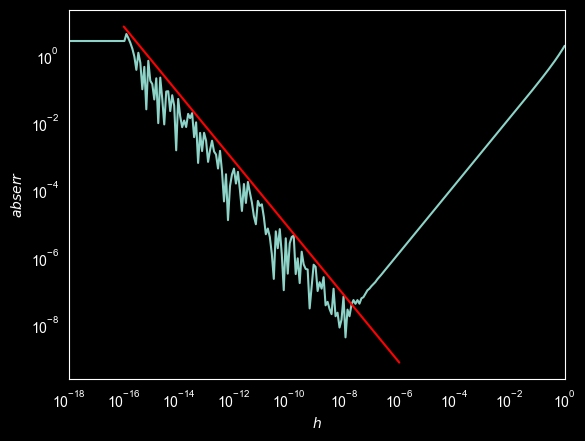

In [16]:
# add the model of rounding error to the graph
h_round = np.logspace(-16,-6,250)
E_round = 2*epsilon*abs(f(a))/abs(h_round) # Estimate of the error in the forward difference calculation
plt.figure(fig1)
plt.plot(h_round,E_round,'r-')
plt.show()

The trends of model & data for the rounding error, as a function of $h$, agree very well &mdash; at least in the rounding-error dominated region, $h<10^{-8}$. The actual truncation error is less than the model predicts, by about a factor of 10, in keeping with it being a 'worst-case' approximation. The model also doesn't predict the 'noisy' variation of the rounding error, as we would expect. It _does_ predict how the rounding error varies with $h$ in the forward difference approximation; i.e. that
$$E_{\text{round}}\propto h^{-1}$$
which is important and useful information, as we'll see. 

## Example 1 &mdash; modelling the truncation error

As the lecture notes explain, using the forward difference method to approximate a derivative is an example of an _infinite problem_; that is, if we wanted an exact answer we would have to do an infinite amount of work. The section on rounding error suggests that we'll never be able to get an exact answer by using floats to represent real numbers, so we have to accept that we'll be computing an approximate answer. That naturally leads to the question of what's the best answer we could hope to get? To answer that, we also need to model the truncation error: the error that comes about from approximating
$$f^\prime(a) \approx \frac{f(a+h)-f(a)}{h}$$
with a finite value of $h$. To find the truncation error, we can use Taylor's theorem: expand the $f(a+h)$ term about $x=a$, as a power series in $h$. Assuming this series converges, we get that
$$\frac{f(a+h)-f(a)}{h} = \frac{f(a)+hf^\prime(a)+\frac{h^2 f^{\prime\prime}(a)}{2!}+\frac{h^3 f^{\prime\prime\prime}(a)}{3!}\ldots-f(a)}{h} = f^\prime(a) + h\left[ \frac{f^{\prime\prime}(a)}{2!} + \frac{h f^{\prime\prime\prime}(a)}{3!} +\ldots \right].$$
So the truncation error is the absolute value of
$$h\left[ \frac{f^{\prime\prime}(a)}{2!} + \frac{h f^{\prime\prime\prime}(a)}{3!} +\ldots \right]$$
If $h$ is small, we should be able make a good model of the truncation error by keeping only the largest, leading-order, term (the one proportional to $h$) and ignoring all the smaller ones (proportional to $h^2$, $h^3$, etc.). So we model the truncation error by
$$E_{\text{trunc}}=\frac{|f^{\prime\prime}(a)|}{2}|h|.$$
There remains the question of how we'd find the value of $f^{\prime\prime}(a)$, given that our algorithm is trying to find $f^\prime(a)$, but we can sidestep that for now, since for example 1 we can calculate everything analytically.

We can plug all that info into Python to create a new model for the error in the forward difference approximation: the sum of rounding and truncation error:
$$E = E_{\text{round}} + E_{\text{trunc}} = \frac{2\epsilon|f(a)|}{|h|} + \frac{|f^{\prime\prime}(a)|}{2}|h|.$$

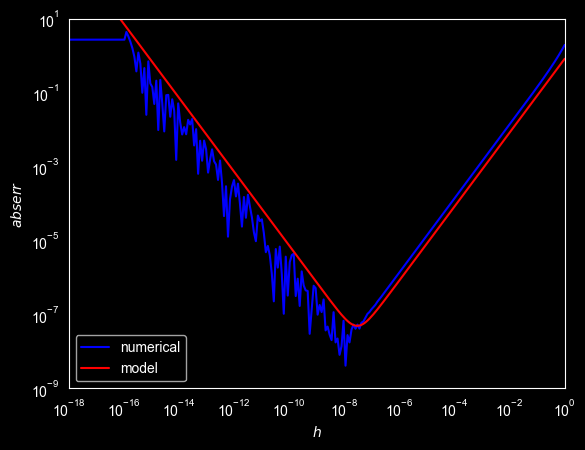

In [17]:
# define f''
def fddash(x):
    y = np.exp(x)
    return y
    
# compute the model absolute error, E
E_round = 2*epsilon*abs(f(a))/abs(h)
E_trunc = abs(fddash(a)*h/2)
E = E_round+E_trunc

# plot both numerically-calculated (blue) and modelled (red) absolute error
plt.plot(h,abserr,'b-',label='numerical')
plt.plot(h,E,'r-',label='model')
plt.grid()                            # add a grid, for ease of visualisation
plt.legend()
plt.xlabel('$h$')                     # add x- and y-axis labels
plt.ylabel('$abserr$')
plt.xscale('log')                     # set both axes to be log-scale
plt.yscale('log')
plt.xlim(1e-18,1e0)                   # format the x- and y-axes nicely
plt.ylim(1e-9,1e1)
plt.xticks(np.logspace(-18,0,10));

The graph shows that our model does predict the forward difference absolute error very well indeed, particularly in the truncation-error dominated region $h>10^{-8}$. There's a small discrepancy for large $h$, around $h=10^0=1$, which comes from the fact that we neglected higher-order terms in the truncation error approximation. But, overall, the model is a good predictor of how the absolute error $E$ of the forward difference approximation varies with $h$, and that there are two main regimes:
* truncation error: large $h$, where $E\propto {|h|}^1$
* rounding error: small $h$, where $E\propto {|h|}^{-1}$

One key conclusion is that the algorithm has a _minimum_ value of the absolute error: we can't even hope to calculate $f^\prime(1)$ 'as accurately as possible' using a forward-difference approximation (i.e., to floating point accuracy). The _best_ we can do is to set a desired error tolerance, and run the algorithm until it's met.

### Exercise
Try changing the function $f(x)$ again, as you did above. What changes, and what doesn't?

## Approximating the error

All of the above analysis has assumed that we know the true answer $f^\prime(1)$: we've used it to calculate the error, as well as (implicitly) in the model of the truncation error. What do we do for a real problem, when we don't know the actual answer should be? As per the lecture notes, given a sequence $\{x_k\}_{k=0,\ldots,n}$ of approximate solutions to a problem, we can approximate the absolute error by calculating
$$\Delta_n=|x_n-x_{n-1}|.$$ 

It's straightforward enough to change our definition of the absolute error in the forward difference approximation code, as long as we make sure to store two values of the approximation, current and previous. Note that it's not possible to approximate the error with only one iterate, so this approximation of the error has to start with something fictitious. It's quite common to start with an error of `np.inf` to denote this first 'unknown' error.

In [18]:
# function to differentiate
def f(x):
    y = np.exp(x)
    return y

# the derivative of f
def fdash(x):
    y = np.exp(x)
    return y

# where to evaluate the derivative
a = 1;

# true answer
true = fdash(a)

# starting value of h
h = 1e0

# minimum value of h
hmin = 1e-16

# change in h per iteration
dh = 1e-2

# current approximation and absolute error
approx = (f(a+h)-f(a))/h
abserr = abs(approx-true)
abserr_approx = np.inf

# pretty print the output
print('        h    (f(a+h)-f(a))/h                E_h            Delta_h');
print('{:9.2e} {:18.14f} {:18.14f} {:18.14f}'.format(h,approx,abserr,abserr_approx))

# generate approximations
while h>hmin:
    # current approximation and error
    h = h*dh
    approx,approx_prev = (f(a+h)-f(a))/h,approx
    abserr = abs(approx-true)
    abserr_approx = abs(approx-approx_prev)
    
    # pretty print the output
    print('{:9.2e} {:18.14f} {:18.14f} {:18.14f}'.format(h,approx,abserr,abserr_approx))

        h    (f(a+h)-f(a))/h                E_h            Delta_h
 1.00e+00   4.67077427047161   1.95249244201256                inf
 1.00e-02   2.73191865578712   0.01363682732808   1.93885561468448
 1.00e-04   2.71841774708292   0.00013591862388   0.01350090870420
 1.00e-06   2.71828318743061   0.00000135897157   0.00013455965231
 1.00e-08   2.71828182185629   0.00000000660275   0.00000136557432
 1.00e-10   2.71828337616853   0.00000154770948   0.00000155431223
 1.00e-12   2.71871414270208   0.00043231424304   0.00043076653355
 1.00e-14   2.70894418008538   0.00933764837366   0.00976996261670
 1.00e-16   0.00000000000000   2.71828182845905   2.70894418008538
 1.00e-18   0.00000000000000   2.71828182845905   0.00000000000000


Plotting a graph of the true and approximated errors is straightforward too:

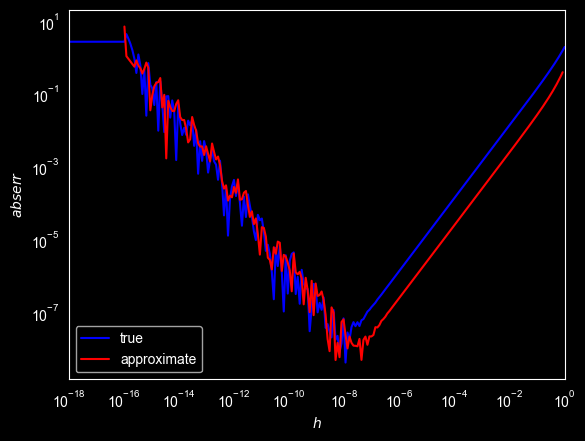

In [19]:
# arrays of values of h, forward difference approximation, and absolute error - true and approximated
h = np.logspace(-18,0,250)
approx = (f(a+h)-f(a))/h
abserr = abs(approx-true)
abserr_approx = np.append(abs(approx[1:]-approx[0:-1]), np.inf)

# replace zero with nan in the approximate error array, to improve the plot
abserr_approx[abserr_approx==0] = np.nan

# plot a graph of true & approximated errors versus h
fig1 = plt.figure()
plt.plot(h,abserr,'b-',label='true')
plt.plot(h,abserr_approx,'r-',label='approximate')
plt.grid()                            # add a grid, for ease of visualisation
plt.legend()
plt.xlabel('$h$')                     # add x- and y-axis labels
plt.ylabel('$abserr$')
plt.xscale('log')                     # set both axes to be log-scale
plt.yscale('log')
plt.xlim(1e-18,1e0)                   # format the x-axis nicely
plt.xticks(np.logspace(-18,0,10));

### Exercise
Try changing $f(x)$ again. What changes, and what doesn't?